In [1]:
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

## v1. 전처리(형태소 분석) 데이터 불러오기

In [1]:
!pip3 install pickle5
import pickle5 as pickle

import pandas as pd
import numpy as np

     |████████████████████████████████| 133kB 12.6MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219249 sha256=028168490b83ced34c52be7724525283a90c1f659d7ccaefe376b34c72c01cf1
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [4]:
with open('NSMC_Okt_morphs.pkl', "rb") as f:
  data = pickle.load(f)

In [5]:
print(data.shape)
data.head()

(194245, 3)


,document,morphs,label
0,아 더빙 진짜 짜증나네요 목소리,"[아, 더빙, 진짜, 짜증나다, 목소리]",0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍다, 않다]",1
2,너무재밓었다그래서보는것을추천한다,"[너, 무재, 밓었, 다그, 래서, 보다, 추천, 다]",0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]",0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,"[사이, 몬페, 그, 익살스럽다, 연기, 돋보이다, 영화, 스파이더맨, 에서, 늙다...",1


# v2. 형태소 분석

In [2]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

In [3]:
data = pd.read_csv('NSMC_preprocessing.csv')

In [4]:
data.head()

,document,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [34]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 460kB 49.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [35]:
from konlpy.tag import Okt

okt = Okt()

In [37]:
# 불용어(stopword) 제거
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [8]:
morphs = []
for sentence in tqdm(data['document']):
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    morphs.append(temp_X)

In [9]:
data['morphs'] = morphs

In [10]:
data.head()

,document,label,morphs
0,아 더빙 진짜 짜증나네요 목소리,0,"[아, 더빙, 진짜, 짜증나다, 목소리]"
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍다, 않다]"
2,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보다, 추천, 다]"
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]"
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1,"[사이, 몬페, 그, 익살스럽다, 연기, 돋보이다, 영화, 스파이더맨, 에서, 늙다..."


In [11]:
data.to_pickle('NSMC_Okt_morphs.pkl')

In [12]:
!pip3 install pickle5
import pickle5 as pickle

In [14]:
with open('NSMC_Okt_morphs.pkl', "rb") as f:
  data = pickle.load(f)

In [15]:
data.head()

,document,label,morphs
0,아 더빙 진짜 짜증나네요 목소리,0,"[아, 더빙, 진짜, 짜증나다, 목소리]"
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍다, 않다]"
2,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보다, 추천, 다]"
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]"
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1,"[사이, 몬페, 그, 익살스럽다, 연기, 돋보이다, 영화, 스파이더맨, 에서, 늙다..."


# 데이터 분할

In [6]:
from sklearn.model_selection import train_test_split

# 학습, 테스트 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(data.morphs, data.label, test_size=0.3, random_state=42)

# 학습, 검증 데이터셋 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape, X_val.shape, X_test.shape)

(108776,) (27195,) (58274,)


# 정수 인코딩

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [10]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 38599
등장 빈도가 2번 이하인 희귀 단어의 수: 21778
단어 집합에서 희귀 단어의 비율: 56.42115080701573
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.2431222778554636


In [11]:
vocab_size = total_cnt - rare_cnt + 1
print(f'단어 집합의 크기 :{vocab_size: ,}')

단어 집합의 크기 : 16,822


In [12]:
tokenizer = Tokenizer(num_words=vocab_size) 
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(X_test)

In [13]:
print(X_train[:5])

[[377, 2124, 174, 41, 10739, 77, 87, 1042, 863, 49, 794, 500, 316, 33, 879, 188], [117, 261, 301], [153, 4700, 7219, 2043, 2431, 113], [5895, 3518, 10, 532], [209, 501, 145, 216, 481, 2148, 165, 3519, 375, 11, 2463, 145, 1]]


In [14]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

## 빈 샘플(empty samples) 제거

In [15]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [16]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

108580
108580


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

In [17]:
import matplotlib.pyplot as plt

10.777979370049733 8.0


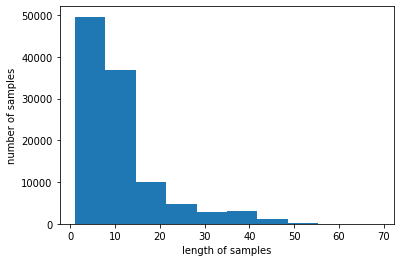

In [18]:
lengths = [len(x) for x in X_train] # X_train(리뷰) 각각의 길이를 갖는 리스트 생성
print(np.mean(lengths), np.median(lengths))

plt.hist(lengths)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
from keras.preprocessing.sequence import pad_sequences

In [20]:
maxlength = 10

X_train_padded = pad_sequences(X_train, maxlen=maxlength)
X_val_padded = pad_sequences(X_val, maxlen=maxlength)
X_test_padded = pad_sequences(X_test, maxlen=maxlength)

In [21]:
print(f"X_train shape = {X_train_padded.shape}")
print(f"X_val shape = {X_val_padded.shape}")
print(f"X_test shape = {X_test_padded.shape}")

X_train shape = (108580, 10)
X_val shape = (27195, 10)
X_test shape = (58274, 10)


# 모델 만들기

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:
model = Sequential()

model.add(Embedding(vocab_size, 128, input_length=maxlength)) # vocab_size = 16822
model.add(LSTM(128, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

# 모델 구조
model.summary()

# 옵티마이저
rmsprop = RMSprop(learning_rate=1e-4)

# 모델 컴파일
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = ModelCheckpoint(f'lstm-embed+dropout-{vocab_size}.h5')
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

# 학습
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=1024, validation_data=(X_val_padded, y_val),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 128)           2153216   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,284,929
Trainable params: 2,284,929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
107/107 [==============================] - 33s 23ms/step - loss: 0.6873 - accuracy: 0.6216 - val_loss: 0.6375 - val_accuracy: 0.7488
Epoch 2/100
107/107 [==============================] - 2s 17ms/step - loss: 0.6012 - accuracy: 0.7401 - val_loss: 0.5347 - val_accuracy: 0.7705
Epoch 3/100
107/107 [==============================] - 2s 17ms/step - loss: 0.5155 - ac

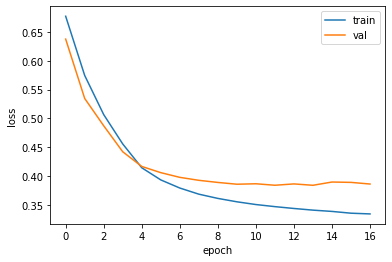

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [25]:
model = Sequential()

model.add(Embedding(vocab_size, 128, input_length=maxlength)) # vocab_size = 16822
model.add(GRU(128, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

# 모델 구조
model.summary()

# 옵티마이저
rmsprop = RMSprop(learning_rate=1e-4)

# 모델 컴파일
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

# 콜백
checkpoint_cb = ModelCheckpoint(f'gru-embed+dropout-{vocab_size}.h5')
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

# 학습
history = model.fit(X_train_padded, y_train, epochs=100, batch_size=1024, validation_data=(X_val_padded, y_val),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 128)           2153216   
_________________________________________________________________
gru (GRU)                    (None, 128)               99072     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,252,417
Trainable params: 2,252,417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
107/107 [==============================] - 3s 18ms/step - loss: 0.6843 - accuracy: 0.6192 - val_loss: 0.6309 - val_accuracy: 0.7565
Epoch 2/100
107/107 [==============================] - 2s 17ms/step - loss: 0.5866 - accuracy: 0.7601 - val_loss: 0.4851 - val_accuracy: 0.7886
Epoch 3/100
107/107 [==============================] - 2s 16ms/step - loss: 0.4691 - a

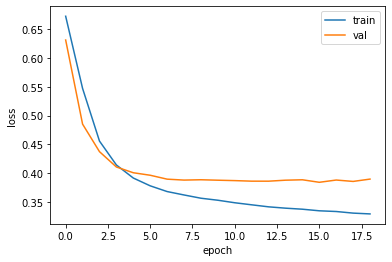

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

# 모델 불러와서 평가하기

In [27]:
from keras.models import load_model

In [28]:
loaded_model = load_model('lstm-embed+dropout-16822.h5')
print(f"테스트 정확도:{round(loaded_model.evaluate(X_test_padded, y_test)[1], 4)}") 

1822/1822 [==============================] - 4s 2ms/step - loss: 0.3841 - accuracy: 0.8307
테스트 정확도:0.8307


In [29]:
loaded_model = load_model('gru-embed+dropout-16822.h5')
print(f"테스트 정확도:{round(loaded_model.evaluate(X_test_padded, y_test)[1], 4)}") 

1822/1822 [==============================] - 4s 2ms/step - loss: 0.3883 - accuracy: 0.8320
테스트 정확도:0.832


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


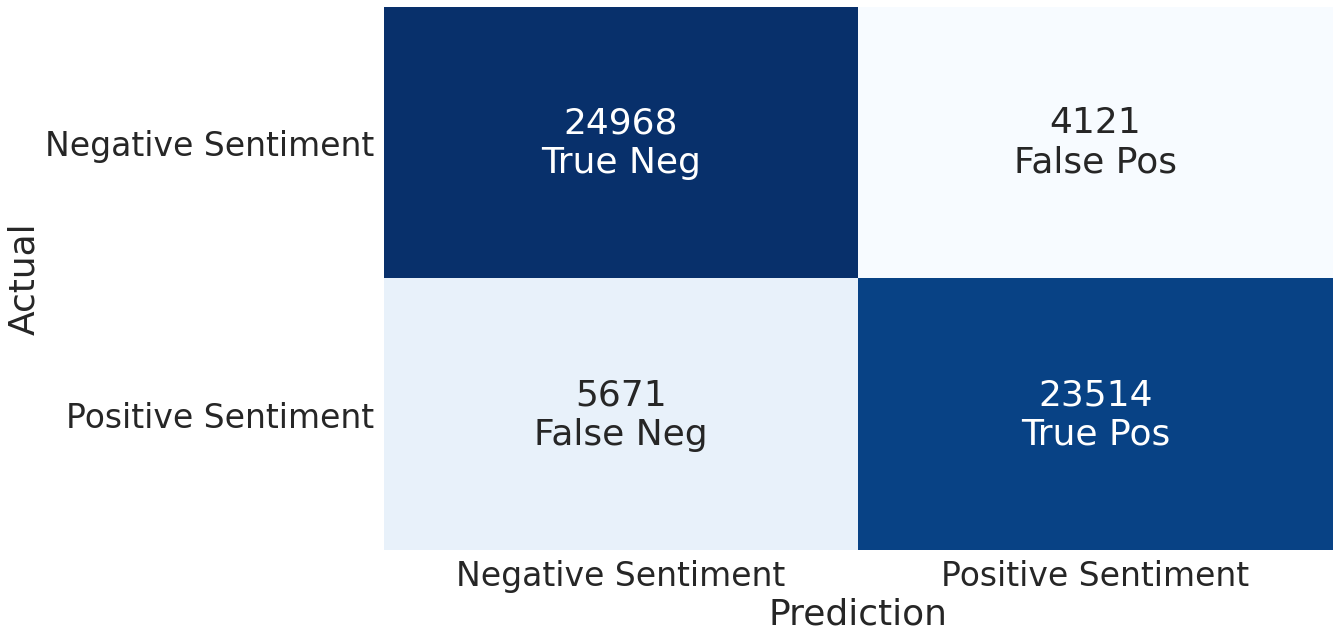

정확도(accuracy) = 0.832
정밀도(precision) = 0.851
재현율(recall) = 0.806


In [31]:
y_test_pred = loaded_model.predict_classes(X_test_padded)
c_matrix = confusion_matrix(y_test, y_test_pred)

group_counts = [f"{value}" for value in c_matrix.flatten()]
group_name = ['True Neg','False Pos','False Neg','True Pos']
labels = [f"{count}\n{name}" for count, name in zip(group_counts, group_name)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(17,10))
ax = sns.heatmap(c_matrix, annot=labels, xticklabels=['Negative Sentiment', 'Positive Sentiment'], yticklabels=['Negative Sentiment', 'Positive Sentiment'], cbar=False, cmap='Blues', fmt='')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

TN, TP, FP, FN = c_matrix[0,0], c_matrix[1,1], c_matrix[0,1], c_matrix[1,0]
accuracy = round((TP+TN) / np.sum(c_matrix), 3)
precision = round(TP / (TP+FP), 3)
recall = round(TP / (TP+FN), 3)
print(f"정확도(accuracy) = {accuracy}")
print(f"정밀도(precision) = {precision}")
print(f"재현율(recall) = {recall}")

# 직접 리뷰 작성하여 모델 평가하기

In [ ]:
# from konlpy.tag import Okt

# okt = Okt()

# # 불용어(stopword) 제거
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [32]:
def sentiment_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = maxlength) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print(f"{round(score * 100, 2)}% 확률로 긍정 리뷰입니다.")
    else:
        print(f"{round((1 - score)* 100, 2)}% 확률로 부정 리뷰입니다.")

In [38]:
sentiment_predict('결말이 너무 뻔하고 지루함')

98.7% 확률로 부정 리뷰입니다.
